In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
processed_data_path = '../data/processed'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [2]:
file_list

['../data/raw\\2025-05-19_19-17_1_2_3_studio.csv']

In [11]:
main_dataframe = pd.read_csv(file_list[0], delimiter=',')
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i], delimiter=',') 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 
main_dataframe.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 76951860,realtor,https://www.cian.ru/sale/flat/316661265/,Москва,sale,flat,9,22,3,78.0,-1,0,34800000,Хорошево-Мневники,бульвар Генерала Карбышева,18,Народное Ополчение,NaN
1,ID 108172779,real_estate_agent,https://www.cian.ru/sale/flat/306823110/,Москва,sale,flat,5,8,2,82.4,-1,0,82317600,Таганский,Славянская площадь,2/5с1,Китай-город,LUMIN
2,Мария Науменко,realtor,https://www.cian.ru/sale/flat/317564335/,Москва,sale,flat,3,9,2,40.0,-1,0,14000000,Царицыно,Каспийская,30К1,Царицыно,NaN
3,Alpha Star Properties,real_estate_agent,https://www.cian.ru/sale/flat/315795006/,Москва,sale,flat,25,61,2,61.0,-1,0,76250000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити,Capital Towers
4,GRAND ESTATE - Премиальная недвижимость,real_estate_agent,https://www.cian.ru/sale/flat/317646469/,Москва,sale,flat,5,5,3,152.0,-1,0,103000000,Красносельский,переулок Даев,31С2,Сухаревская,NaN


In [12]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price', 'floor', 'floors_count', 'rooms_count']].set_index('url_id')
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 316661265 to 298357160
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_meters  1312 non-null   float64
 1   price         1312 non-null   int64  
 2   floor         1312 non-null   int64  
 3   floors_count  1312 non-null   int64  
 4   rooms_count   1312 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 61.5+ KB


In [7]:
new_dataframe.to_csv(f"{processed_data_path}/train_data_nb.csv")

<Axes: >

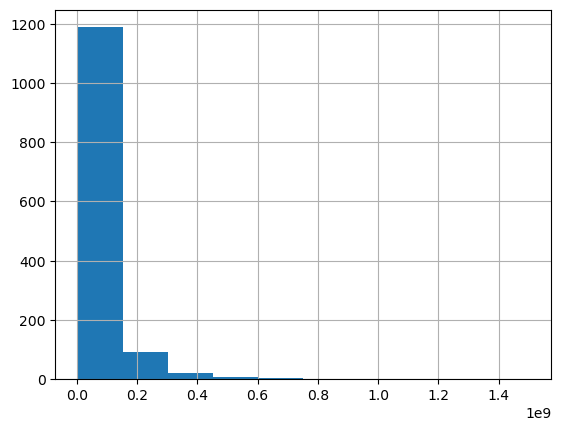

In [8]:
new_dataframe['price'].hist()

In [9]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]

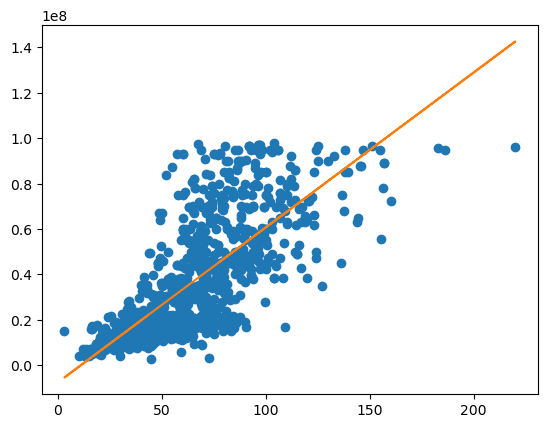

In [10]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)